# Analysis of Novel Corona Virus

In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load `Novel Coronavirus (2019-nCoV) Cases, provided by JHU CSSE` Dataset

In [2]:
scope = [
'https://spreadsheets.google.com/feeds',
'https://www.googleapis.com/auth/drive',
]

json_file_name = 'gspread-266617-f39ee6d19800.json'
credentials = ServiceAccountCredentials.from_json_keyfile_name(json_file_name, scope)

gc = gspread.authorize(credentials)
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1yZv9w9zRKwrGTaR-YzmAqMefw4wMlaXocejdxZaTs6w/htmlview?usp=sharing&sle=true#'
doc = gc.open_by_url(spreadsheet_url)

## Current Dataset Status

In [3]:
sheet_list = doc.worksheets()
sheet_nm = []
for i in sheet_list:
    sheet_nm.append(i.title)
print('sheets number :', len(sheet_list))
sheet_nm

sheets number : 19


['Jan29_9pm',
 'Jan29_230pm',
 'Jan29_130pm',
 'Jan28_11pm',
 'Jan28_6pm',
 'Jan28_1pm',
 'Jan27_830pm',
 'Jan27_7pm',
 'Jan27_9am',
 'Jan26_11pm',
 'Jan26_11am',
 'Jan25_10pm',
 'Jan25_12pm',
 'Jan25_12am',
 'Jan24_12pm',
 'Jan24_12am',
 'Jan23_12pm',
 'Jan22_12pm',
 'Jan22_12am']

## Convert to pandas DataFrame

In [4]:
df_list = []
for i in sheet_nm:
    
    print(i)
    
    data = doc.worksheet(i).get_all_values()
    globals()[i] = pd.DataFrame(data[1:], columns=data[0])
    
    df_list.append(globals()[i])

Jan29_9pm
Jan29_230pm
Jan29_130pm
Jan28_11pm
Jan28_6pm
Jan28_1pm
Jan27_830pm
Jan27_7pm
Jan27_9am
Jan26_11pm
Jan26_11am
Jan25_10pm
Jan25_12pm
Jan25_12am
Jan24_12pm
Jan24_12am
Jan23_12pm
Jan22_12pm
Jan22_12am


In [5]:
for df in df_list:
    print(set(df.columns))

{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Suspected', 'Province/State'}
{'Deaths', 'Recover

## Only use datasets of the same type for analysis

- That is, data after 12 PM on January 23  
- Based on selecting only datasets that have the following columns in common.

```
'Province / State',
'Country / Region',
'Last Update',
'Confirmed',
'Deaths',
'Recovered'
```

## Exclude remaining datasets

In [6]:
rm_items = ['Jan22_12am','Jan22_12pm','Jan23_12pm']
for i in rm_items:
    sheet_nm.remove(i)
sheet_nm

['Jan29_9pm',
 'Jan29_230pm',
 'Jan29_130pm',
 'Jan28_11pm',
 'Jan28_6pm',
 'Jan28_1pm',
 'Jan27_830pm',
 'Jan27_7pm',
 'Jan27_9am',
 'Jan26_11pm',
 'Jan26_11am',
 'Jan25_10pm',
 'Jan25_12pm',
 'Jan25_12am',
 'Jan24_12pm',
 'Jan24_12am']

## Common column list

In [7]:
col_list=[
            'Province/State',
            'Country/Region',
            'Last Update',
            'Confirmed',
            'Deaths',
            'Recovered'
         ]

## Data integration

In [8]:
df = pd.DataFrame()
for i in sheet_nm:
    
    try:
        print('Complete :', i)
        globals()[i] = globals()[i][col_list]
        df = pd.concat([df, globals()[i]])
        
    except:
        print('Failed :', i)

df=pd.DataFrame(df,columns=col_list)
df.index = range(len(df))

Complete : Jan29_9pm
Complete : Jan29_230pm
Complete : Jan29_130pm
Complete : Jan28_11pm
Complete : Jan28_6pm
Complete : Jan28_1pm
Complete : Jan27_830pm
Complete : Jan27_7pm
Complete : Jan27_9am
Complete : Jan26_11pm
Complete : Jan26_11am
Complete : Jan25_10pm
Complete : Jan25_12pm
Complete : Jan25_12am
Complete : Jan24_12pm
Complete : Jan24_12am


## Pre-processing

### Check dates and times in different formats

In [11]:
set(df['Last Update'])

{'1/24/2020 12:00 AM',
 '1/24/2020 12:00 PM',
 '1/24/2020 4:00 PM',
 '1/25/2020 10:00 PM',
 '1/25/2020 12:00 AM',
 '1/25/2020 12:00 PM',
 '1/26/2020 11:00 AM',
 '1/26/2020 23:00',
 '1/27/2020 19:00',
 '1/27/2020 20:30',
 '1/27/2020 9:00',
 '1/28/2020 13:00',
 '1/28/2020 18:00',
 '1/28/2020 23:00',
 '1/29/2020 13:30',
 '1/29/2020 14:30',
 '1/29/2020 21:00'}

### Standardize the dates and times

In [12]:
import datetime

date_list=[]
for i in df['Last Update']:
    
    try:
        a=datetime.datetime.strptime(i, "%m/%d/%Y %H:%M")
        b=datetime.datetime.strftime(a, "%Y-%m-%d %H:%M")

    except:
        a=datetime.datetime.strptime(i, "%m/%d/%Y %I:%M %p")
        b=datetime.datetime.strftime(a, "%Y-%m-%d %H:%M")
        
    date_list.append(b)

date_list

df['Last Update'] = date_list

In [16]:
# Data type conversion
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed'] = pd.to_numeric(df['Confirmed'])
df['Deaths'] = pd.to_numeric(df['Deaths'])
df['Recovered'] = pd.to_numeric(df['Recovered'])

# Feature Engineering
df['D/C'] = (df['Deaths']/df['Confirmed'])*100
df['R/C'] = (df['Recovered']/df['Confirmed'])*100

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 8 columns):
Province/State    772 non-null object
Country/Region    772 non-null object
Last Update       772 non-null datetime64[ns]
Confirmed         769 non-null float64
Deaths            92 non-null float64
Recovered         152 non-null float64
D/C               92 non-null float64
R/C               152 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 48.4+ KB


### Create country-specific data sets

In [18]:
# List of Country/Region
country_list = list(set(df['Country/Region']))
country_list

['Mainland China',
 'United Arab Emirates',
 'Singapore',
 'Vietnam',
 'US',
 'Sri Lanka',
 'France',
 'Cambodia',
 'Macau',
 'Finland',
 'Ivory Coast',
 'Nepal',
 'Australia',
 'South Korea',
 'Taiwan',
 'Malaysia',
 'Thailand',
 'Germany',
 'Japan',
 'Hong Kong',
 'Canada']

In [20]:
for i in country_list:
    globals()[i.replace(' ','_')] = df[df['Country/Region']==i]
    globals()[i.replace(' ','_')] = globals()[i.replace(' ','_')].sort_values('Last Update', ascending=True)
    globals()[i.replace(' ','_')].index = range(len(globals()[i.replace(' ','_')]))    
    print(i.replace(' ','_'))

Mainland_China
United_Arab_Emirates
Singapore
Vietnam
US
Sri_Lanka
France
Cambodia
Macau
Finland
Ivory_Coast
Nepal
Australia
South_Korea
Taiwan
Malaysia
Thailand
Germany
Japan
Hong_Kong
Canada


## Hubei

In [62]:
Hubei = Mainland_China[Mainland_China['Province/State']=='Hubei']
Hubei.index = range(len(Hubei))
Hubei.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,D/C,R/C
11,Hubei,Mainland China,2020-01-28 18:00:00,3554.0,125.0,80.0,3.517164,2.250985
12,Hubei,Mainland China,2020-01-28 23:00:00,3554.0,125.0,80.0,3.517164,2.250985
13,Hubei,Mainland China,2020-01-29 13:30:00,3554.0,125.0,80.0,3.517164,2.250985
14,Hubei,Mainland China,2020-01-29 14:30:00,3554.0,125.0,88.0,3.517164,2.476083
15,Hubei,Mainland China,2020-01-29 21:00:00,4586.0,162.0,90.0,3.532490,1.962495


## Shanghai

In [61]:
Shanghai = Mainland_China[Mainland_China['Province/State']=='Shanghai']
Shanghai.index = range(len(Shanghai))
Shanghai.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,D/C,R/C
11,Shanghai,Mainland China,2020-01-28 18:00:00,66.0,1.0,4.0,1.515152,6.060606
12,Shanghai,Mainland China,2020-01-28 23:00:00,80.0,1.0,4.0,1.250000,5.000000
13,Shanghai,Mainland China,2020-01-29 13:30:00,96.0,1.0,4.0,1.041667,4.166667
14,Shanghai,Mainland China,2020-01-29 14:30:00,96.0,1.0,5.0,1.041667,5.208333
15,Shanghai,Mainland China,2020-01-29 21:00:00,101.0,1.0,5.0,0.990099,4.950495


## South Korea

In [60]:
South_Korea.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,D/C,R/C
11,,South Korea,2020-01-28 18:00:00,4.0,NaN,NaN,NaN,NaN
12,,South Korea,2020-01-28 23:00:00,4.0,NaN,NaN,NaN,NaN
13,,South Korea,2020-01-29 13:30:00,4.0,NaN,NaN,NaN,NaN
14,,South Korea,2020-01-29 14:30:00,4.0,NaN,NaN,NaN,NaN
15,,South Korea,2020-01-29 21:00:00,4.0,NaN,NaN,NaN,NaN


## Thailand

In [64]:
Thailand.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,D/C,R/C
11,,Thailand,2020-01-28 18:00:00,14.0,NaN,5.0,NaN,35.714286
12,,Thailand,2020-01-28 23:00:00,14.0,NaN,5.0,NaN,35.714286
13,,Thailand,2020-01-29 13:30:00,14.0,NaN,5.0,NaN,35.714286
14,,Thailand,2020-01-29 14:30:00,14.0,NaN,5.0,NaN,35.714286
15,,Thailand,2020-01-29 21:00:00,14.0,NaN,5.0,NaN,35.714286


## Visualization

In [52]:
class corona():
    
    def __init__(self, data_nm):
        
        # set dataset
        self.data_nm = data_nm
        self.dataset = globals()[self.data_nm].copy()
        
        # set date index
        self.dataset.index = self.dataset['Last Update']
        self.dataset.index = self.dataset.index.astype("category")
        self.objects = list(self.dataset.index)
        self.y_pos = np.arange(len(self.objects))        
    
    def plot_confirmed(self):

        plt.figure(figsize=(15,5))
        plt.title(self.data_nm+'(Confirmed)', size='25', weight='bold')
        plt.plot(self.y_pos, self.dataset['Confirmed'], color='dodgerblue', linewidth=3, marker='o')
        plt.xticks(y_pos, objects, rotation=45)
        plt.xlabel('Reported Time', size='20')
        plt.ylabel('Count', size='20')
        plt.show()

    def plot_deaths_recovered(self):
        
        plt.figure(figsize=(15,5))
        plt.title(self.data_nm+'(Deaths, Recovered)', size='25', weight='bold')
        plt.plot(self.y_pos, self.dataset['Deaths'], color='tomato', label='Deaths', linewidth=3, marker='o')
        plt.plot(self.y_pos, self.dataset['Recovered'], color='orange', label='Recovered', linewidth=3, marker='o')
        plt.legend(loc='upper left')
        plt.xticks(y_pos, objects, rotation=45)
        plt.xlabel('Reported Time', size='20')
        plt.ylabel('Count', size='20')
        plt.show()
        
    def plot_dc_rc(self):
        plt.figure(figsize=(15,5))
        plt.title(self.data_nm+'(D/C, R/C)', size='25', weight='bold')
        plt.plot(self.y_pos, self.dataset['D/C'], color='tomato', label='D/C', linewidth=3, marker='o')
        plt.plot(self.y_pos, self.dataset['R/C'], color='orange', label='R/C', linewidth=3, marker='o')
        plt.legend(loc='upper left')
        plt.xticks(y_pos, objects, rotation=45)
        plt.xlabel('Reported Time', size='20')
        plt.ylabel('Indicator values(%)', size='20')
        plt.show()

## Hubei

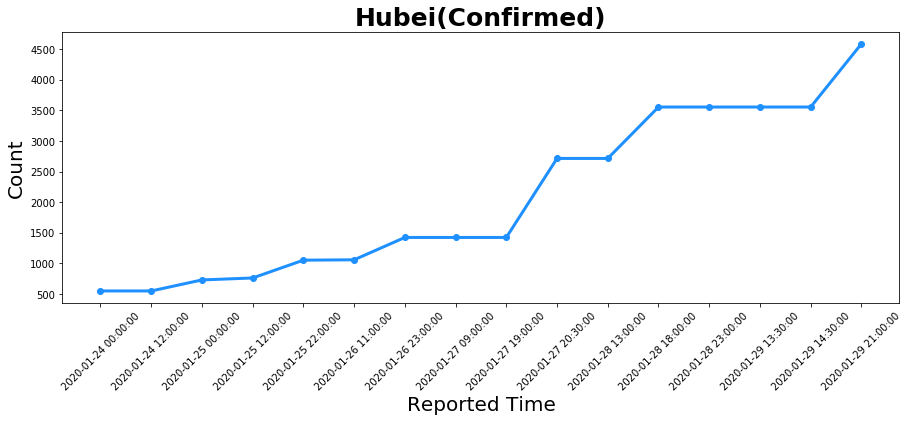

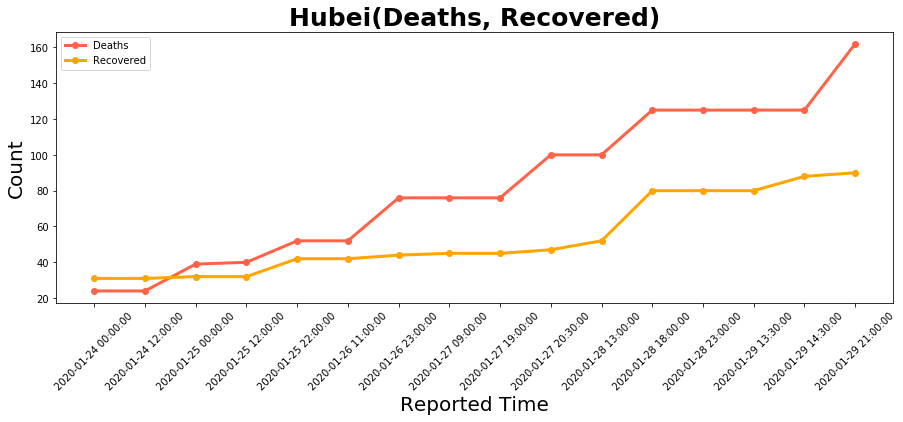

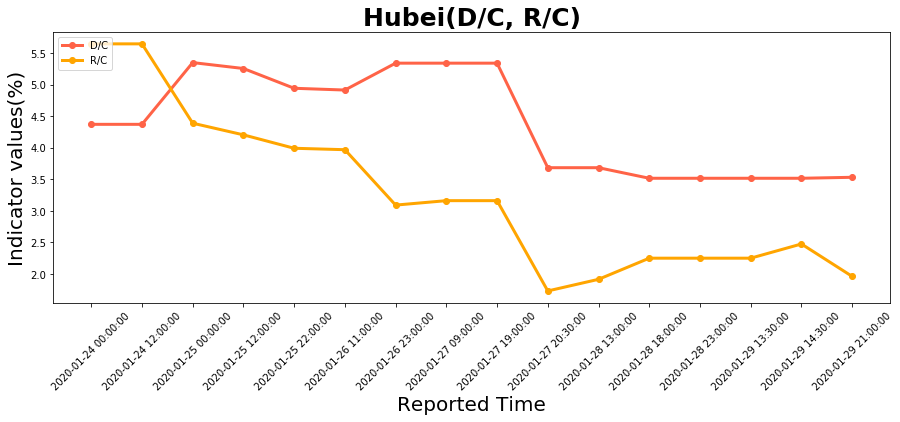

In [53]:
h=corona('Hubei')
h.plot_confirmed()
h.plot_deaths_recovered()
h.plot_dc_rc()

## Shanghai

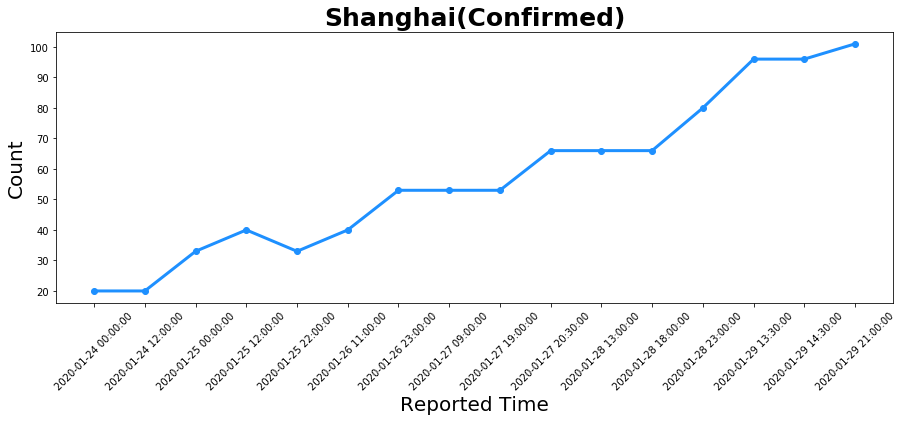

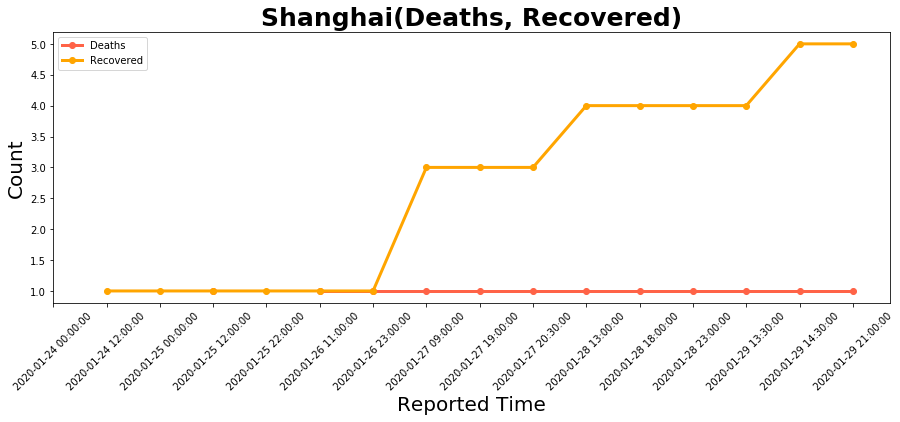

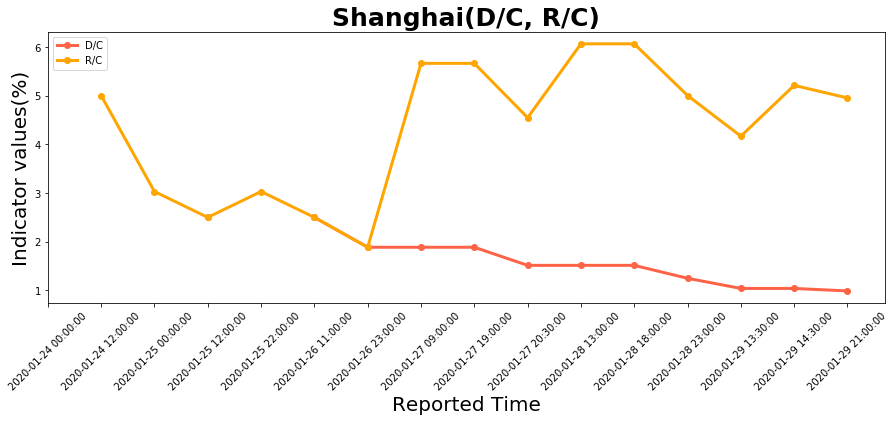

In [63]:
h=corona('Shanghai')
h.plot_confirmed()
h.plot_deaths_recovered()
h.plot_dc_rc()

## South Korea

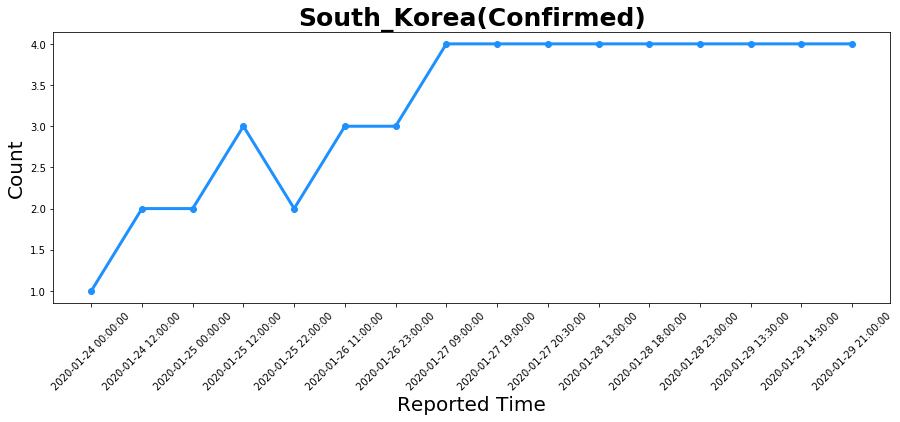

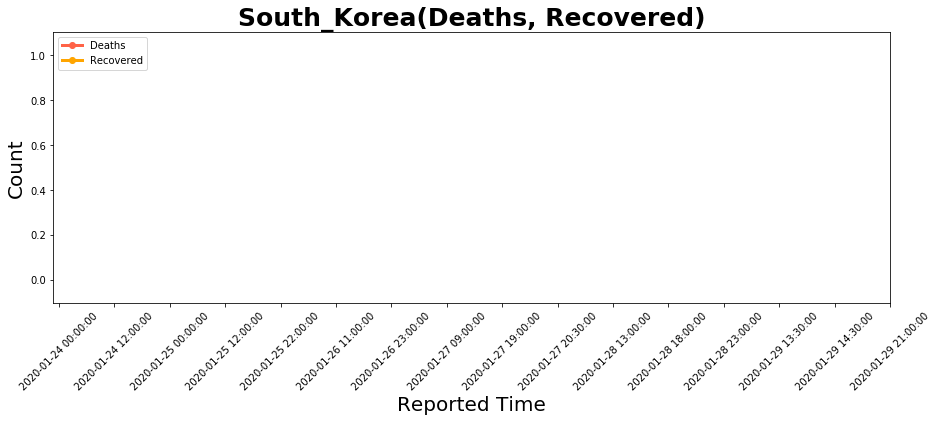

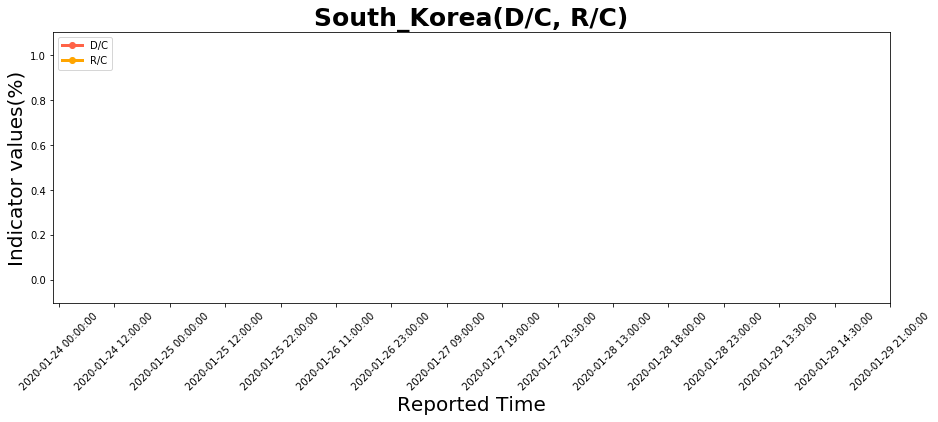

In [65]:
h=corona('South_Korea')
h.plot_confirmed()
h.plot_deaths_recovered()
h.plot_dc_rc()

## Thailand

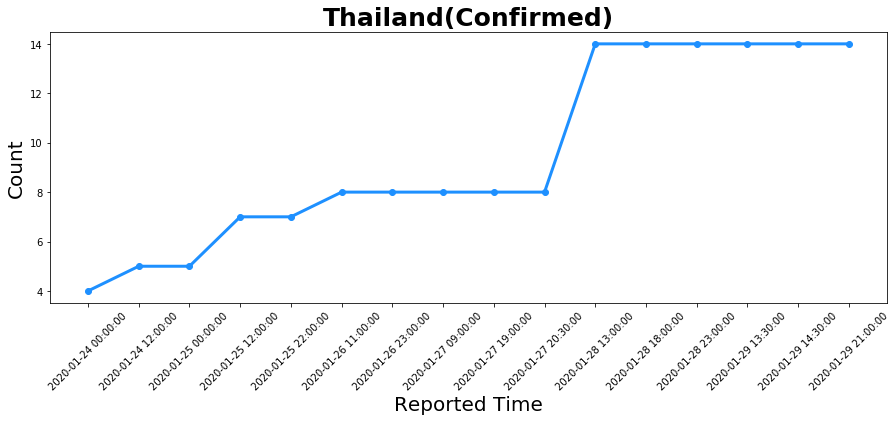

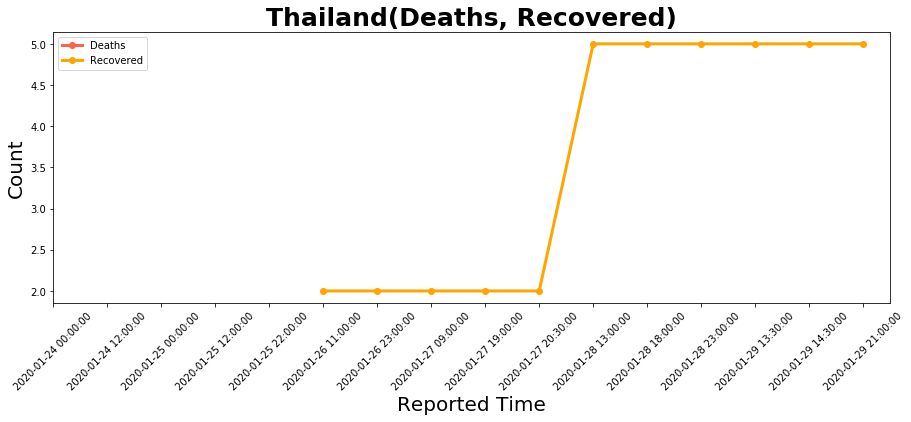

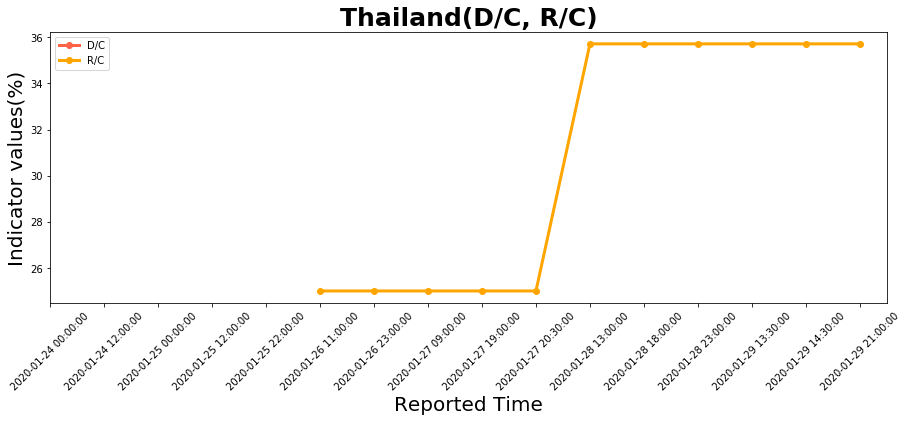

In [66]:
h=corona('Thailand')
h.plot_confirmed()
h.plot_deaths_recovered()
h.plot_dc_rc()